In [ ]:
!pip install sumy

In [ ]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
import re

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd

train = pd.read_csv('sorted_dataset.csv')

train_df = pd.DataFrame(train)

train_df.head(3)

In [ ]:
train_df["commentry"][0]

'0.1 Madushanka to Gurbaz, no run, short of length outside off, Gurbaz goes on the back foot to punch to mid-off'

In [ ]:
distinct_count = train_df["match"].nunique()

distinct_count

47

In [ ]:
target_text = ""

for i in range(300):
  target_text = target_text + train_df["commentry"][i] + '.'

In [ ]:
def count_sentences_regex(text):
  sentence_pattern = r"(?<!\w\.)(?<!\w\?)(?<!\w!)(?:\.|\?|!)"
  # Split the text into sentences using the regular expression
  sentences = re.split(sentence_pattern, text)
  # Remove empty strings after splitting
  sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
  # Count the number of sentences
  return len(sentences)

In [ ]:
number_of_sentences = count_sentences_regex(target_text)
print(f"The text has {number_of_sentences} sentences.")

The text has 727 sentences.


In [ ]:
parser = PlaintextParser.from_string(target_text, Tokenizer("english"))
summarizer = LexRankSummarizer()

summary = summarizer(parser.document, 50) #Summarize the document with 100 sentences

In [ ]:
!pip install lexrank

In [ ]:
summary = lxr.get_summary(sentences, summary_size=2, threshold=.1)
print(summary)

In [ ]:
sentence_list= [str(sentence) for sentence in summary]

In [ ]:
ARTICLE = "".join(sentence_list)

In [ ]:
ARTICLE

"0.1 Madushanka to Gurbaz, no run, short of length outside off, Gurbaz goes on the back foot to punch to mid-off.0.2 Madushanka to Gurbaz, no run, fullish on the stumps, shapes back in a tad, flicked to backward square leg.0.3 Madushanka to Gurbaz, no run, short of length on off, punched to cover.0.4 Madushanka to Gurbaz, out Bowled!!Rajitha is a swing bowler, gets the outswinger outside off going, Ibrahim Zadran tries to play a nothing steer and misses.1.4 Rajitha to Ibrahim Zadran, no run, full outswinger outside off, Ibrahim Zadran gets forward to drive to cover who dives and pushes it away, they don't risk the quick single.1.5 Rajitha to Ibrahim Zadran, no run, short of length outside off, Ibrahim Zadran punches it to the left of Rajitha.1.6 Rajitha to Ibrahim Zadran, 3 runs, shape on this full outswinger outside off, Ibrahim Zadran gets forward and drives wide of cover, was in control of the shot and takes three.2.1 Madushanka to Ibrahim Zadran, no run, full on off, no swing, a fi

In [ ]:
count_sentences_regex(ARTICLE)

602

In [ ]:
summary_text = ARTICLE

In [ ]:
summary_text = summary_text.lower()

In [ ]:
target_text

'0.1 Madushanka to Gurbaz, no run, short of length outside off, Gurbaz goes on the back foot to punch to mid-off.0.2 Madushanka to Gurbaz, no run, fullish on the stumps, shapes back in a tad, flicked to backward square leg.0.3 Madushanka to Gurbaz, no run, short of length on off, punched to cover.0.4 Madushanka to Gurbaz, out Bowled!! Gone! What a start for Madushanka and Sri Lanka. He goes full and knocks over Gurbaz with the inswinger. Gurbaz plants his front foot across and flicks way too square, misses, flicks the pad and knocks over the middle-stump. Big wicket and that\'s the start Sri Lanka wanted. Gurbaz b Madushanka 0(4).0.5 Madushanka to Rahmat, 1 run, ooh! Good ball again, similar to the one that got Gurbaz, Rahmat though gets a thick inside-edge on the flick to fine-leg and is off the mark.0.6 Madushanka to Ibrahim Zadran, 1 run, full and swinging into middle-stump, Ibrahim Zadran plays it beautifully, shows the full face of the bat and pushes it firmly, mid-off needs to di

In [ ]:
summary_text

"0.1 madushanka to gurbaz, no run, short of length outside off, gurbaz goes on the back foot to punch to mid-off.0.2 madushanka to gurbaz, no run, fullish on the stumps, shapes back in a tad, flicked to backward square leg.0.3 madushanka to gurbaz, no run, short of length on off, punched to cover.0.4 madushanka to gurbaz, out bowled!!rajitha is a swing bowler, gets the outswinger outside off going, ibrahim zadran tries to play a nothing steer and misses.1.4 rajitha to ibrahim zadran, no run, full outswinger outside off, ibrahim zadran gets forward to drive to cover who dives and pushes it away, they don't risk the quick single.1.5 rajitha to ibrahim zadran, no run, short of length outside off, ibrahim zadran punches it to the left of rajitha.1.6 rajitha to ibrahim zadran, 3 runs, shape on this full outswinger outside off, ibrahim zadran gets forward and drives wide of cover, was in control of the shot and takes three.2.1 madushanka to ibrahim zadran, no run, full on off, no swing, a fi

In [ ]:
patterns = [
    (r'\bfour\b', '4'),  # '\b' ensures whole word match
    (r'\bsix\b', '6'),
    (r'\bno run\b', '0')
]

# Iterate over patterns and perform replacements
for pattern, replacement in patterns:
    summary_text = re.sub(pattern, replacement, summary_text)

print(len(summary_text))

34859


In [52]:
summary_text

"0.1 madushanka to gurbaz, 0, short of length outside off, gurbaz goes on the back foot to punch to mid-off.0.2 madushanka to gurbaz, 0, fullish on the stumps, shapes back in a tad, flicked to backward square leg.0.3 madushanka to gurbaz, 0, short of length on off, punched to cover.0.4 madushanka to gurbaz, out bowled!!rajitha is a swing bowler, gets the outswinger outside off going, ibrahim zadran tries to play a nothing steer and misses.1.4 rajitha to ibrahim zadran, 0, full outswinger outside off, ibrahim zadran gets forward to drive to cover who dives and pushes it away, they don't risk the quick single.1.5 rajitha to ibrahim zadran, 0, short of length outside off, ibrahim zadran punches it to the left of rajitha.1.6 rajitha to ibrahim zadran, 3 runs, shape on this full outswinger outside off, ibrahim zadran gets forward and drives wide of cover, was in control of the shot and takes three.2.1 madushanka to ibrahim zadran, 0, full on off, no swing, a firm push off the front foot wit

In [ ]:
# Define the regular expression pattern
pattern = r"to ([\w\s]+), (\d+)"

player_tot_runs = {}
player_num_balls = {}

player_sr_progress = {}

matches = re.finditer(pattern, summary_text)

# Iterate over matches and extract information
for match in matches:
    player_name = match.group(1)
    if player_name not in player_tot_runs:
      player_tot_runs[player_name] = {"runs" : 0}
      player_num_balls[player_name] = {"balls" : 0}
      player_sr_progress[player_name] = {"runs" : [], "balls" : []}

    runs_scored = int(match.group(2))
    player_tot_runs[player_name]["runs"] += runs_scored
    player_num_balls[player_name]["balls"] += 1

    player_sr_progress[player_name]["runs"].append(player_tot_runs[player_name]["runs"])
    player_sr_progress[player_name]["balls"].append(player_num_balls[player_name]["balls"])

In [ ]:
player_tot_runs

{'gurbaz': {'runs': 0},
 'ibrahim zadran': {'runs': 28},
 'rahmat': {'runs': 53},
 'shahidi': {'runs': 54},
 'azmatullah': {'runs': 45},
 'asalanka': {'runs': 6},
 'mathews': {'runs': 7},
 'chameera': {'runs': 1},
 'theekshana': {'runs': 4}}

In [ ]:
player_num_balls

{'gurbaz': {'balls': 3},
 'ibrahim zadran': {'balls': 50},
 'rahmat': {'balls': 69},
 'shahidi': {'balls': 64},
 'azmatullah': {'balls': 46},
 'asalanka': {'balls': 5},
 'mathews': {'balls': 13},
 'chameera': {'balls': 2},
 'theekshana': {'balls': 9}}

In [ ]:
player_strike_rates  = {}

for player in player_tot_runs:
  player_strike_rates[player] = player_tot_runs[player]["runs"]/player_num_balls[player]["balls"]

In [ ]:
player_strike_rates

{'gurbaz': 0.0,
 'ibrahim zadran': 0.56,
 'rahmat': 0.7681159420289855,
 'shahidi': 0.84375,
 'azmatullah': 0.9782608695652174,
 'asalanka': 1.2,
 'mathews': 0.5384615384615384,
 'chameera': 0.5,
 'theekshana': 0.4444444444444444}

In [ ]:
player_sr_progress

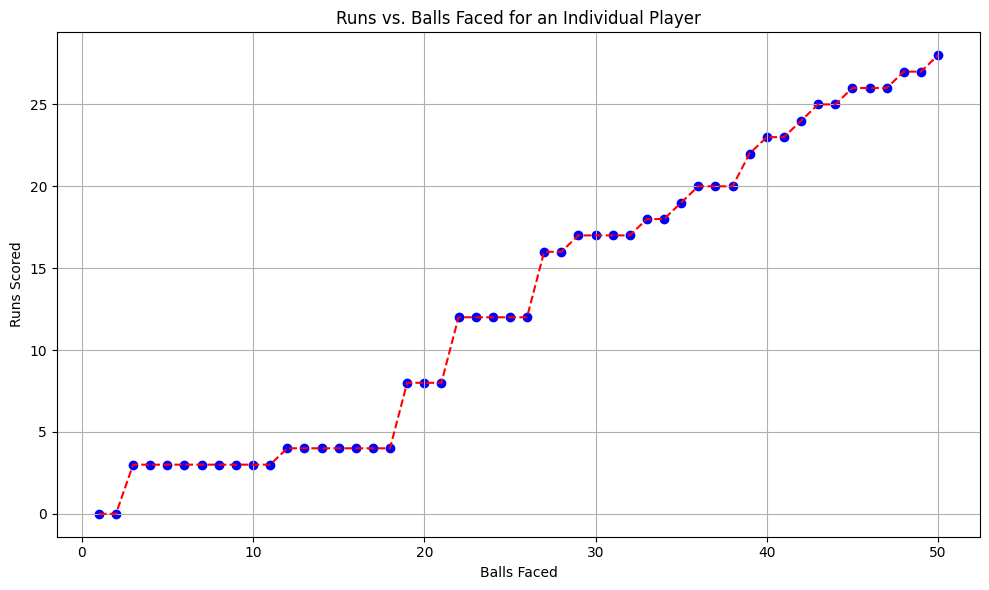

In [ ]:
import matplotlib.pyplot as plt

player_runs = player_sr_progress["ibrahim zadran"]["runs"]
player_balls = player_sr_progress["ibrahim zadran"]["balls"]

# Plotting the scatter plot for runs vs. balls
plt.figure(figsize=(10, 6))
plt.scatter(player_balls, player_runs, color='blue')
plt.plot(player_balls, player_runs, linestyle='--', color='red')
plt.xlabel('Balls Faced')
plt.ylabel('Runs Scored')
plt.title('Runs vs. Balls Faced for an Individual Player')
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
# Define the regular expression pattern
pattern = r"(\d+\.\d+)(?:\s+)?([\w\s\-]+) to ([\w\s\-]+), ([\w\s]+) "

# Initialize dictionaries to store bowler stats
bowler_wickets = {}

# Find matches using the pattern
matches = re.finditer(pattern, summary_text)

# Iterate over matches and extract information
for match in matches:
    # print(match)
    ball_number = match.group(1)
    bowler_name = match.group(2)
    batsman_name = match.group(3)
    is_wicket = ('out' in match.group(4))

    # Update bowler wickets dictionary
    if(len(ball_number) < 5):
      if bowler_name not in bowler_wickets:
          bowler_wickets[bowler_name] = {"wickets": 0, "ball": []}

    if is_wicket and len(ball_number) < 5:
      bowler_wickets[bowler_name]["wickets"] += 1
      bowler_wickets[bowler_name]["ball"].append(ball_number)

# Print bowler wickets
for bowler, stats in bowler_wickets.items():
    print(f"Bowler: {bowler}, Wickets: {stats['wickets']}, Ball: {', '.join(stats['ball'])}")

Bowler: madushanka, Wickets: 2, Ball: 0.4, 16.5
Bowler: rajitha, Wickets: 0, Ball: 
Bowler: mathews, Wickets: 0, Ball: 
Bowler: theekshana, Wickets: 0, Ball: 
Bowler: chameera, Wickets: 0, Ball: 
Bowler: dhananjaya, Wickets: 0, Ball: 
Bowler: rashid khan, Wickets: 2, Ball: 35.6, 39.6
Bowler: fazalhaq farooqi, Wickets: 0, Ball: 
Bowler: azmatullah, Wickets: 0, Ball: 


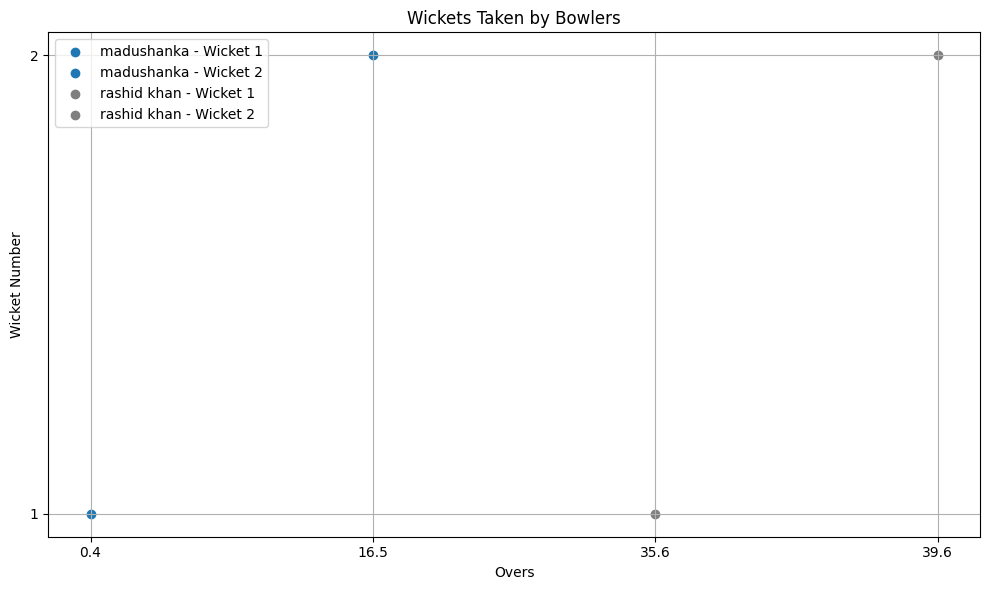

In [51]:
import matplotlib.pyplot as plt
import numpy as np
# Generate unique colors for each bowler
colors = plt.cm.tab10(np.linspace(0, 1, len(bowler_wickets)))

# Set figure size
plt.figure(figsize=(10, 6))

# Plot scatterplot for each bowler
for i, (bowler, stats) in enumerate(bowler_wickets.items()):
    wickets = stats["wickets"]
    balls = stats["ball"]
    color = colors[i]

    # Plotting scatterplot
    for j, ball in enumerate(balls):
        plt.scatter(ball, j + 1, label=f"{bowler} - Wicket {j + 1}", marker='o', color=color)

# Setting plot properties
plt.xlabel("Overs")
plt.ylabel("Wicket Number")
plt.title("Wickets Taken by Bowlers")
plt.grid(True)
plt.yticks(range(1, max(len(stats["ball"]) for stats in bowler_wickets.values()) + 1))

# Show plot
plt.legend()
plt.tight_layout()
plt.show()
# plt.xlim(0, 50)  # Limiting x-axis to maximum 50 balls
# plt.ylim(0.5,len(balls) + 0.5)  # Adding padding for y-axis

# # Show plot
# plt.legend()
# plt.tight_layout()
# plt.show()

In [54]:
# Define the regular expression pattern
pattern = r"(\d+\.\d+)(?:\s+)?([\w\s\-]+) to ([\w\s\-]+), (\d+)"

player_tot_runs = {}
player_num_balls = {}
player_runs_given = {}

# Find matches using the pattern
matches = re.finditer(pattern, summary_text)

# Iterate over matches and extract information
for match in matches:
    ball_number = match.group(1)
    bowler_name = match.group(2)
    batsman_name = match.group(3)
    runs_scored = int(match.group(4))

    # Update runs given by bowler
    if bowler_name not in player_runs_given:
        player_runs_given[bowler_name] = []

    player_runs_given[bowler_name].append(runs_scored)

# Print bowler stats
for bowler, runs_given in player_runs_given.items():
    print(f"Bowler: {bowler}, Runs Given: {runs_given}")

Bowler: madushanka, Runs Given: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 4, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 6, 1, 4, 1, 1, 0, 1, 0, 0, 0, 1, 4]
Bowler: rajitha, Runs Given: [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 3, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1]
Bowler: mathews, Runs Given: [0, 1, 0, 4, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 0]
Bowler: chameera, Runs Given: [0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 6, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 4, 1, 0, 1, 0, 0, 1, 1, 1, 6, 0, 0, 1, 1]
Bowler: theekshana, Runs Given: [0, 0, 1, 4, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 4, 0, 1, 1, 1, 0, 1, 1, 6, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0]
Bowler: dhananjaya, Runs Given: [4, 0, 1, 0, 0, 1, 1, 1, 4, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1]
Bowler: fazalhaq farooqi, Runs Given: [1, 0, 0, 0, 0, 0, 0, 0]
Bowler: rashid khan, Runs Given: [4, 0, 0, 1, 1, 0,

In [55]:
player_economy_rates = {}

for player in player_runs_given:
    total_runs_given = sum(player_runs_given[player])
    total_balls_bowled = len(player_runs_given[player])

    if total_balls_bowled > 0:
        economy_rate = total_runs_given / total_balls_bowled
    else:
        economy_rate = 0

    player_economy_rates[player] = economy_rate

print("Player Economy Rates:")
for player, economy_rate in player_economy_rates.items():
    print(f"{player}: {economy_rate}")

Player Economy Rates:
madushanka: 0.8444444444444444
rajitha: 0.4634146341463415
mathews: 0.8235294117647058
chameera: 0.851063829787234
theekshana: 0.8275862068965517
dhananjaya: 0.875
fazalhaq farooqi: 0.125
rashid khan: 1.0
azmatullah: 0.3333333333333333


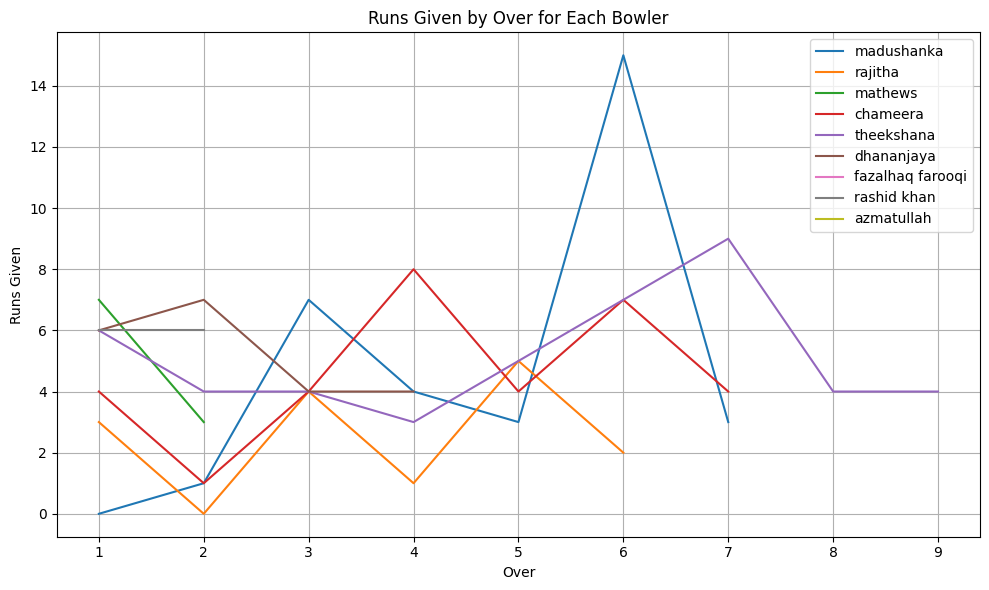

In [56]:
import matplotlib.pyplot as plt

# Grouping runs given by each over for each bowler
bowler_runs_by_over = {}
for bowler, runs_given in player_runs_given.items():
    over_runs = []
    over_total = 0
    for i, runs in enumerate(runs_given, start=1):
        over_total += runs
        if i % 6 == 0:
            over_runs.append(over_total)
            over_total = 0
    bowler_runs_by_over[bowler] = over_runs

# Plotting runs given by each over for each bowler
plt.figure(figsize=(10, 6))
for bowler, runs_by_over in bowler_runs_by_over.items():
    overs = list(range(1, len(runs_by_over) + 1))
    plt.plot(overs, runs_by_over, label=bowler)

plt.xlabel('Over')
plt.ylabel('Runs Given')
plt.title('Runs Given by Over for Each Bowler')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
pattern_4 = r'\b4\b'  # '\b' ensures whole word match
pattern_6 = r'\b6\b'

# Find all occurrences of '4' and '6' in the text
matches_4 = re.findall(pattern_4, summary_text)
matches_6 = re.findall(pattern_6, summary_text)

# Get the count of '4' and '6' occurrences
count_4 = len(matches_4)
count_6 = len(matches_6)

print(f"Count of '4': {count_4}")
print(f"Count of '6': {count_6}")

Count of '4': 66
Count of '6': 55
